# 线性回归的反向传播

In [1]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [2]:
def generate_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, size=y.shape)
    return X, y.reshape((-1, 1))
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = generate_data(true_w, true_b, 1000)

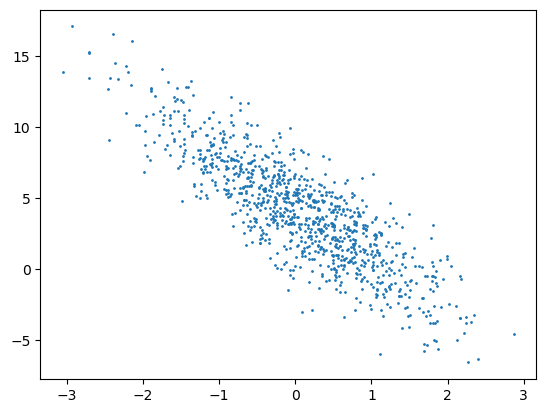

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
# scatter plot
plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)
plt.show()


In [4]:
import random
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # random read
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [5]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [6]:
w

tensor([[-0.0058],
        [-0.0122]], requires_grad=True)

In [7]:
b

tensor([0.], requires_grad=True)

In [8]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [9]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [10]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size=10, features=features, labels=labels):
        l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w,b], lr, batch_size=10)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.053463
epoch 2, loss 0.000249
epoch 3, loss 0.000050


In [11]:
import torch 
import numpy as np
from torch.utils import data


In [12]:
help(torch.nn.Cro-ssEntropyLoss)

AttributeError: module 'torch.nn' has no attribute 'Cro'